In [258]:
from IPython.core.pylabtools import figsize
%matplotlib inline
import math
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

simulator = AerSimulator()

In [259]:
def run_with_plot(circuit, shots=1024, ax=None, should_show_close=True, figsize=None):
    counts = simulator.run(circuit, shots=shots).result().get_counts(circuit)
    if should_show_close:
        plt.close()
    plot_histogram(counts, ax=ax, figsize=figsize)
    if should_show_close:
        plt.show()
        plt.close()


def draw_bloch_sphere(state):
    plt.close()
    plot_bloch_multivector(state)
    plt.show()
    plt.close()


def bloch_coords(a, b):
    x = round(float((b.conjugate() * a + b * a.conjugate()).real), 5)
    y = round(float((1j * (b.conjugate() * a - b * a.conjugate())).real), 5)
    z = round(float((a * a.conjugate() - b * b.conjugate()).real), 5)
    return x, y, z


def cartesian_to_spherical(x, y, z):
    r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = math.degrees(math.atan2(math.sqrt(x ** 2 + y ** 2), z))
    phi = math.degrees(math.atan2(y, x) if r != 0 else 0)
    return phi, theta, r


def print_state_2qubits(state):
    qubits = ['00', '10', '01', '11']
    print("state: ", end="")
    for i in range(len(state.data) - 1):
        print(f"{qubits[i]}: {state.data[i]}", end=", ")
    print(f"{qubits[-1]}: {state.data[-1]}")


def print_state_3qubits(state):
    qubits = ['000', '100', '010', '110', '001', '101', '011', '111']
    print("state: ", end="")
    for i in range(len(state.data) - 1):
        print(f"{qubits[i]}: {state.data[i]}", end=", ")
    print(f"{qubits[-1]}: {state.data[-1]}")


def draw_circuit(circuit):
    plt.close()
    circuit.draw('mpl')
    plt.show()
    plt.close()

# Упражнение 3

### 1.
<br>Соберите схему для получения запутанного состояния квантовой системы из
двух кубитов √1/2
(| 00⟩− | 11⟩). Выполните симуляцию работы схемы. Получите математическое обоснование результата.

state: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
probas: [0.5 0.  0.  0.5]


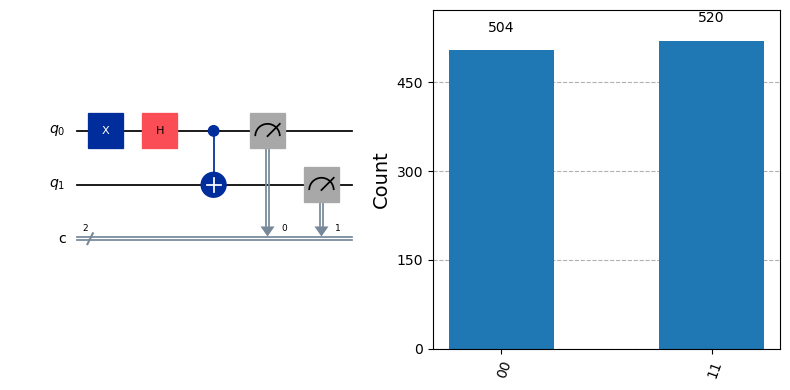

In [260]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.x(q_reg[0])
circuit.h(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Для q[0] до $CNOT$ получаем $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$, q[1] равен $|0\rangle$, тогда суперпозиция для двух кубитов $\frac{1}{\sqrt{2}}\left(|00\rangle - |10\rangle\right)$. Применим $CNOT$ к этому состоянию, причём из-за линейности оператора можем применять к компонентам суперпозиции. $CNOT |00\rangle = |00\rangle$ и $CNOT |10\rangle = |11\rangle$. Тогда итоговое состояние $\frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$.

### 2.
<br>
Соберите схему для получения запутанного состояния квантовой системы из
двух кубитов √1/2 (| 00⟩+ | 11⟩). Выполните симуляцию работы схемы. Получите математическое обоснование результата

state: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
probas: [0.5 0.  0.  0.5]


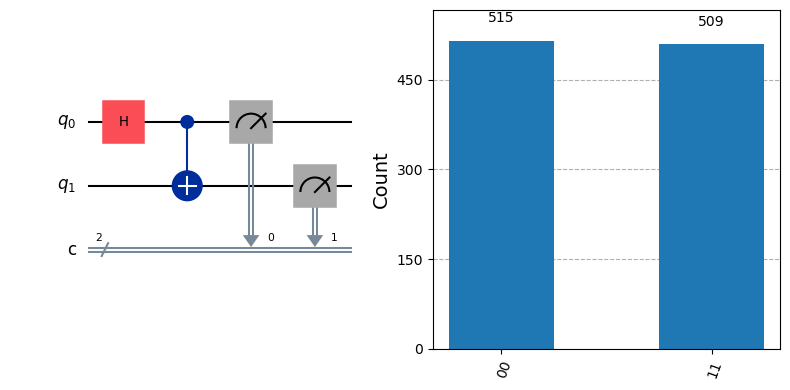

In [261]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Здесь, в отличие от предыдущего пункта, q[0] до $CNOT$ равен $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. Далее применяем $CNOT$, получаем $\frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.

### 3.
<br>
Соберите схему для получения запутанного состояния квантовой системы из
двух кубитов √1/2
(| 01⟩− | 10⟩). Выполните симуляцию работы схемы. Получите математическое обоснование результата.


state: 00: 0j, 10: (-0.7071067811865475+0j), 01: (0.7071067811865475+0j), 11: 0j
probas: [0.  0.5 0.5 0. ]


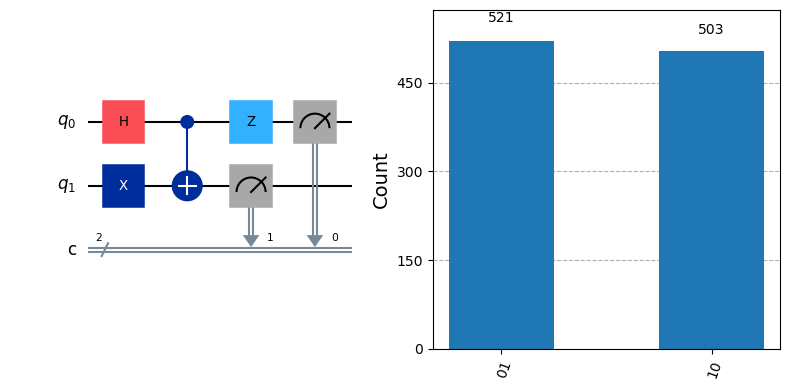

In [262]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[1])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

До $CNOT$: $\frac{1}{\sqrt{2}}\left( |01\rangle + |11\rangle \right)$. Применив $CNOT$: $\frac{1}{\sqrt{2}}\left( |01\rangle + |10\rangle \right)$

$
Z = 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$. Тогда для $|0\rangle$: 
$
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \cdot
\begin{pmatrix}
1\\
0 
\end{pmatrix} = 
\begin{pmatrix}
1\\
0 
\end{pmatrix} = |0\rangle
$. Для $|1\rangle$:
$
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \cdot
\begin{pmatrix}
0\\
1 
\end{pmatrix} = 
\begin{pmatrix}
0\\
-1
\end{pmatrix} = -|1\rangle
$


В итоге получаем $\frac{1}{\sqrt{2}}\left( |01\rangle - |10\rangle \right)$.

### 4.
<br>
Соберите схему для получения запутанного состояния квантовой системы из
двух кубитов √1/2
(| 01⟩+ | 10⟩). Выполните симуляцию работы схемы. Получите математическое обоснование результата

state: 00: 0j, 10: (0.7071067811865475+0j), 01: (0.7071067811865475+0j), 11: 0j
probas: [0.  0.5 0.5 0. ]


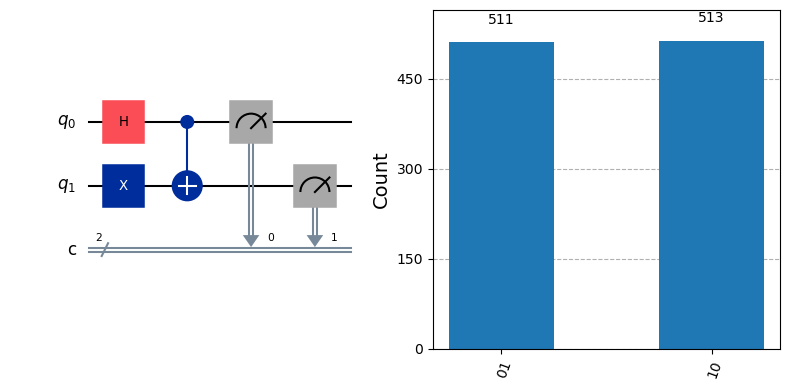

In [263]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Эта схема - предыдущая без $Z$. До применения $Z$ состояние как раз было равно $\frac{1}{\sqrt{2}}\left( |01\rangle + |10\rangle \right)$.

### 5. Вариант 14
<br>
Соберите схему для получения запутанного состояния квантовой системы из
двух кубитов в соответствии с вариантами задания приведенными в таблице 2.
Выполните симуляцию работы схемы. Получите математическое обоснование
результата.

![](images/lab2/table_cell.png)

state: 00: 0j, 10: (-0.8062257748298549+0j), 01: (0.5916079783099616+0j), 11: 0j
probas: [0.   0.65 0.35 0.  ]


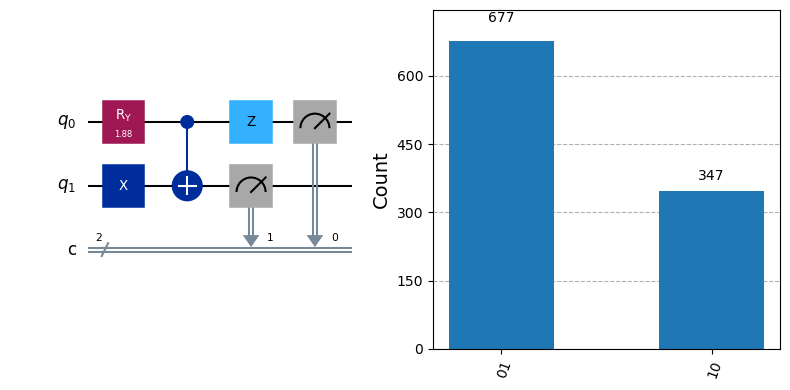

In [264]:
a_prob = 0.35
a = math.sqrt(a_prob)
theta = 2 * math.acos(a)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(theta, q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[1])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Чтобы задать $a$ и положительный $b$, воспользуемся $Ry(\theta)$, который из $|0\rangle$ получит $\cos \left( \frac{\theta}{2} \right)|0\rangle + \sin \left( \frac{\theta}{2} \right)|1\rangle$. Если положительный $\theta < \pi => 0.5 \theta < 0.5 \pi$, то cos и sin - положительные. Значит $\theta$ можно взять как $\arccos(\sqrt{|a|^2})$. Далее, получив нужные $a$ и $b$, действуем как в п. 3, чтобы получить нужную пару состояний $a|01\rangle +b|10\rangle$ и минус перед $b|10\rangle$.

### 6.
<br>
Соберите схему для получения запутанного состояния квантовой системы из
трех кубитов a|010> + b|111> в соответствии с вариантами заданий, приведенными в таблице 2. Выполните симуляцию работы схемы. Получите математическое обоснование результата.

state: 000: 0j, 100: 0j, 010: (0.5916079783099616+0j), 110: 0j, 001: 0j, 101: 0j, 011: 0j, 111: (0.8062257748298549+0j)
probas: [0.   0.   0.35 0.   0.   0.   0.   0.65]


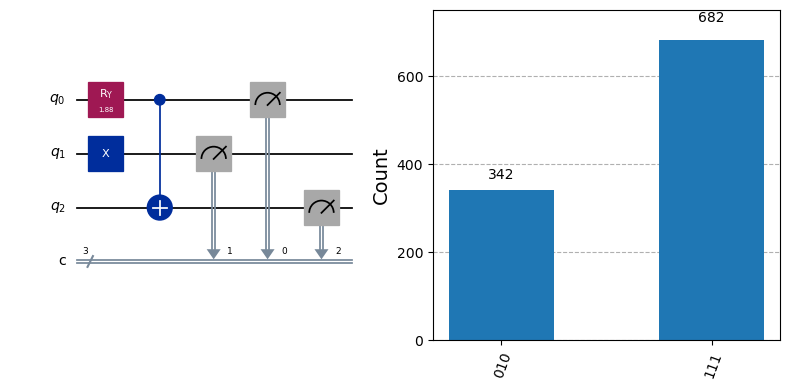

In [265]:
a_prob = 0.35
a = math.sqrt(a_prob)
theta = 2 * math.acos(a)

q_reg = QuantumRegister(3, 'q')
c_reg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(theta, q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[2])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
circuit.measure(q_reg[2], c_reg[2])
print_state_3qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Опять используем $Ry$, чтобы получить $a$ и $b$. q[1] равен $|1\rangle$ в обоих случаях, так что его просто инвертируем. Для задания q[2] используем $CNOT$, тогда его значение будет совпадать с q[0].

### 7.
<br>
Соберите схему для получения запутанного состояния квантовой системы из
двух кубитов 𝛼|00 > +𝛽|01 > +𝛾|11 >, в соответствии с вариантами заданий,
приведенными в таблице 3. Выполните симуляцию работы схемы. Получите
математическое обоснование результата.


![](images/lab2/table_cell2.png)

Определим операцию $CRy(\lambda)$ (Controlled $Ry$) (в данном случае первый кубит a - контролирующий):


![](images/lab2/cry.png)

Если контролирующий кубит равен $|0\rangle$, кубит-цель поворачивается вокруг $Oy$ на $0.5\lambda$, затем на $0.5\lambda$ обратно, то есть остаётся таким, каким был. Иначе он инвертируется до второго поворота, поворачивается инвертированным, затем снова инвертируется. Это эквивалентно повороту на $\lambda$. В итоге, поворот на $\lambda$ происходит, если контролирующий кубит ненулевой, иначе не происходит.

state: 00: (0.5000000000000001+0j), 10: 0j, 01: (0.5000000000000001+0j), 11: (0.7071067811865476+0j)
probas: [0.25 0.   0.25 0.5 ]


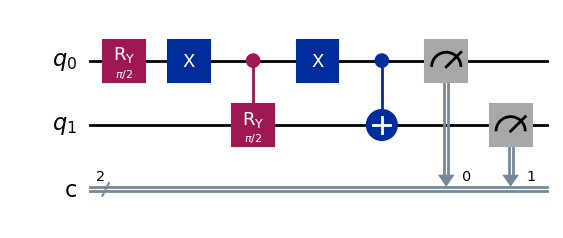

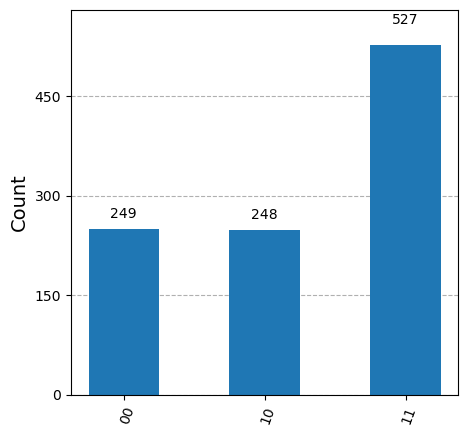

In [266]:
alpha_prob = 0.25
gamma_prob = 0.5
not_gamma_prob = 1 - gamma_prob
alpha = math.sqrt(alpha_prob)
g_theta = 2 * math.acos(math.sqrt(not_gamma_prob))
sub_alpha_prob = alpha_prob / not_gamma_prob
sub_alpha = math.sqrt(sub_alpha_prob)
a_theta = 2 * math.acos(sub_alpha)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(g_theta, q_reg[0])
circuit.x(q_reg[0])
circuit.cry(a_theta, q_reg[0], q_reg[1])
circuit.x(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

circuit.draw(output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False)

plt.show()

На гистограмме q[1] идёт первым, q[0] вторым. Сначала q[0] поворачивается на $2 \arccos\left( \sqrt{1 - |\gamma|^2} \right)$, чтобы вероятность $|0\rangle$ была равна $1 - |\gamma|^2$, а вероятность $|1\rangle$ равна $|\gamma|^2$. Затем инвертируем q[0], чтобы $CRy$ происходил, если он после поворота равен $|0\rangle$. Угол поворота для q[1] равен $2 \arccos(\sqrt{\frac{|\alpha|^2}{1 - |\gamma|^2}})$ (под корнем вероятность для q[1] быть нулевым при условии q[0] = 0). Затем q[0] снова инвертируется, чтобы получить значение после поворота, а на q[1] действует $CNOT$ под контролем q[0] (так как для q[0]$ = |1\rangle$ нужен q[1]$ = |1\rangle$, он подействует только если поворота не происходило).

# Упражнение 4. Вариант 14

### 14.
<br>
Реализуйте алгоритм умножения на 5. Выполните симуляцию. Получите математическое обоснование результата.

Если число $m$ закодировано состоянием $|m\rangle = |q_0q_1...q_{n-1}\rangle$, к нему можно применить преобразование QFT, которое переведёт его в состояние, где вектор состояния каждого кубита лежит в $Oxy$, а его фаза выражается как $\phi_i = \frac{2m \pi}{2^{i+1}}$, где $i$ - номер кубита.

<div>
<img src="images/lab2/qft.png" width="1000"/>
</div>

Тогда прибавить к $m$ число $k$ в Фурье базисе - значит повернуть $q_i$ на $\frac{2k \pi}{2^{i+1}}$ вокруг $Oz$ для каждого бита $q_i$ числа $m$ (после QFT).
<br>
Умножение двух чисел $m$ и $k$ можно представить как $m \cdot k = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} m_i k_j \left( 2 ^{n - i - 1} \cdot 2^{n - j - 1} \right)
$, если каждое представлено $n$ битами. 
<br>
$m \cdot k = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} m_i k_j \left( 2 ^{2n - i -  j - 2} \right)$


Будем использовать регистры $m$ и $k$ длиной $n$ каждый для операндов, регистр $out$ длиной $2n$ - для ответа. Изначально ответ в состоянии $|0...0\rangle$, $m$ и $k$ как-то инициализированы (конкретными состояниями, а не суперпозициями). Применим к ответу QFT. Затем нужно для каждого кубита ответа $out_t$ и контролирующей пары кубитов $m_i$ и $k_j$ поворачивать $out_t$ на $\displaystyle\frac{2\pi \cdot 2^{2n - i -  j - 2}}{2^{t+1}}$, если $m_i$ и $k_j$ равны $|1\rangle$ каждый. Это гейт $\displaystyle P\left(\frac{2\pi \cdot 2^{2n - i -  j - 2}}{2^{t+1}}\right)$ (с контролем от $m_i$ и $k_j$). Затем применяем inverse QFT, чтобы получить результат и измерить его состояние.

010100


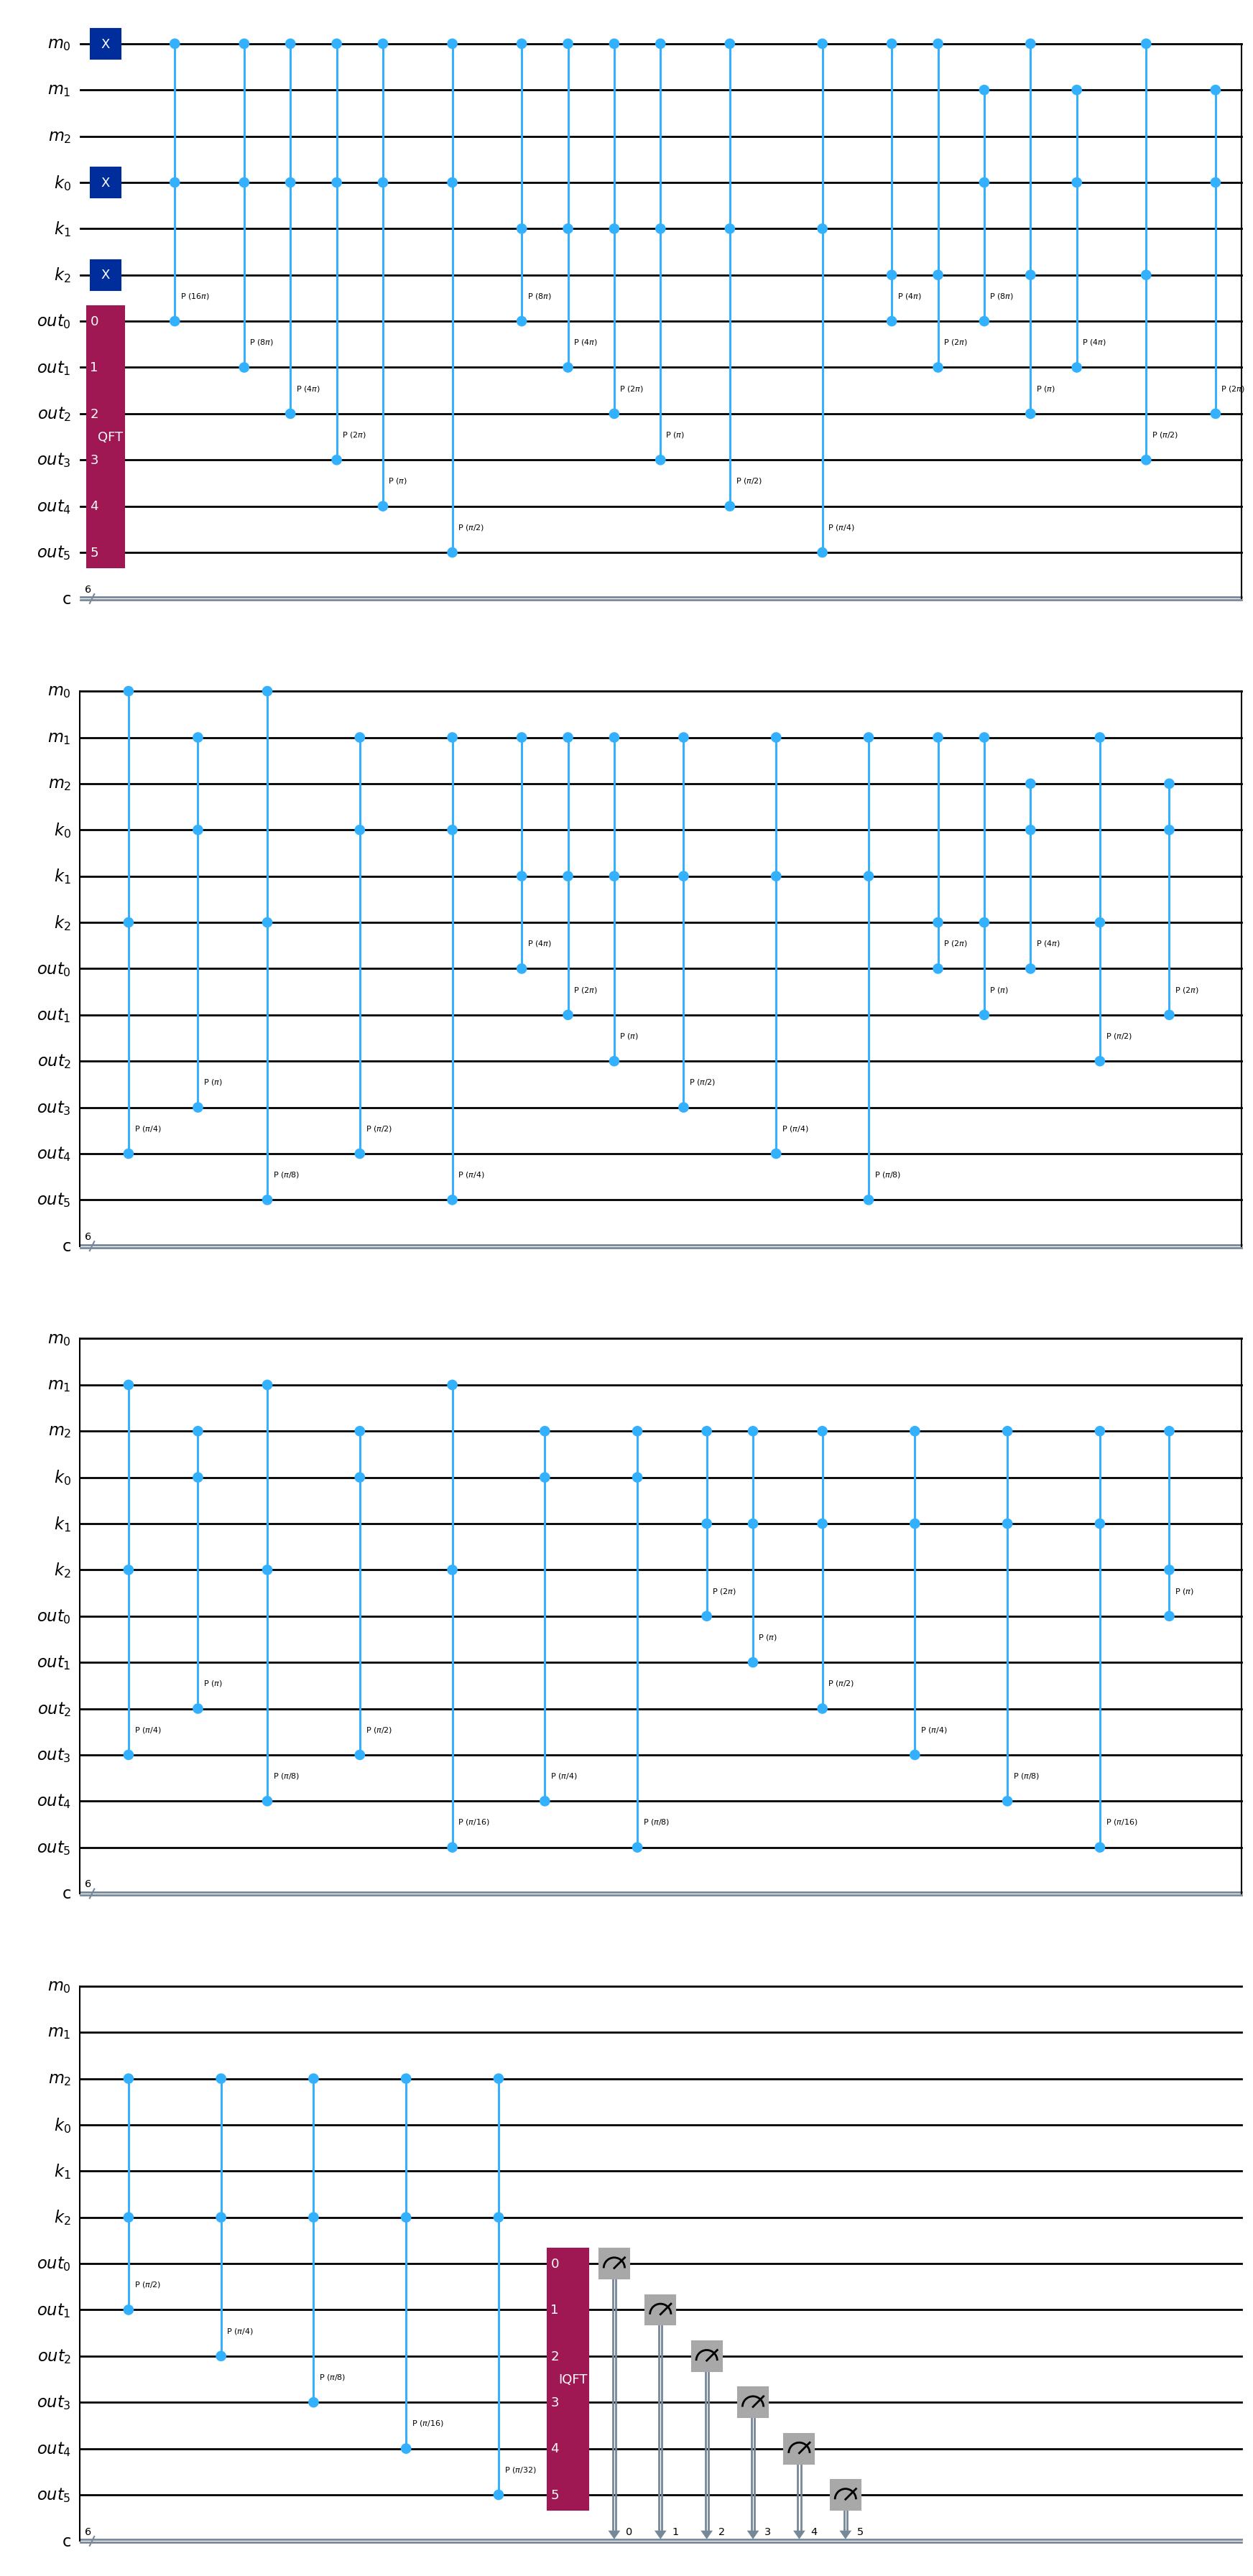

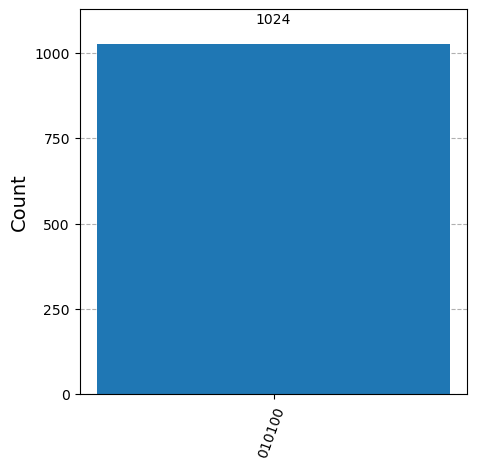

In [267]:
from qiskit.circuit.library import QFT
from qiskit import transpile
from qiskit.circuit.library.standard_gates import PhaseGate

num_state_qubits = 3
num_result_qubits = 2 * num_state_qubits
q_m = QuantumRegister(num_state_qubits, name="m")
q_k = QuantumRegister(num_state_qubits, name="k")
qr_out = QuantumRegister(num_result_qubits, name="out")

# build multiplication circuit
circuit = QuantumCircuit(q_m, q_k, qr_out)

circuit.x(q_m[0])

circuit.x(q_k[0])
circuit.x(q_k[2])

circuit.append(QFT(num_result_qubits, do_swaps=False).to_gate(), qr_out[:])

for j in range(1, num_state_qubits + 1):
    for i in range(1, num_state_qubits + 1):
        for t in range(1, num_result_qubits + 1):
            phase_change = (2 * np.pi) / (2 ** (i + j + t - 2 * num_state_qubits))
            circuit.append(PhaseGate(phase_change).control(2),
                           [q_m[j - 1], q_k[i - 1], qr_out[t - 1]])

circuit.append(QFT(num_result_qubits, do_swaps=False).inverse().to_gate(), qr_out[:])
c = ClassicalRegister(qr_out.size, name="c")
circuit.add_register(c)
for i in range(qr_out.size):
    circuit.measure(qr_out[i], c[i])
circuit.draw(output='mpl')

qc = transpile(circuit, simulator)
counts = simulator.run(qc).result().get_counts(qc)
max_state = max(counts, key=counts.get)
print(max_state)
plot_histogram(counts, figsize=(5, 5))
plt.show()


Умножалось 4 на 5, получили $010100_2 = 20_{10}$. Алгоритм отработал правильно.